In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

bitcoin = pd.read_csv('/home/ml/datasets/bitcoin_60.csv',delimiter=';', index_col='Date',parse_dates=['Date'])
bitcoin.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-20,8039.07,8336.86,7949.36,8200.64,3488450000
2017-11-19,7766.03,8101.91,7694.10,8036.49,3149320000
2017-11-18,7697.21,7884.99,7463.44,7790.15,3667190000
2017-11-17,7853.57,8004.59,7561.09,7708.99,4651670000
2017-11-16,7323.24,7967.38,7176.58,7871.69,5123810000


In [2]:
bitcoin = bitcoin.iloc[::-1]

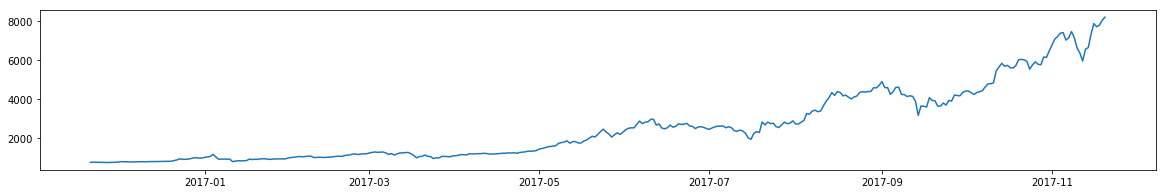

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(bitcoin.index, bitcoin['Close'] , label="Close")

In [4]:
bitcoin['SMA14'] = bitcoin['Close'].rolling(window=14,min_periods=1).mean().round(3)

In [5]:
price_close = bitcoin['Close']
diff = np.ediff1d([price_close])
price_diff = np.append(diff,[0], axis=0)

bitcoin['Y'] = np.add(price_close, price_diff)

In [6]:
bitcoin.head()

,Open,High,Low,Close,Volume,SMA14,Y
Date,,,,,,,
2016-11-21,731.26,741.72,730.51,739.25,60802400,739.250,751.35
2016-11-22,739.64,753.87,736.53,751.35,129906000,745.300,744.59
2016-11-23,751.74,752.25,738.92,744.59,76543800,745.063,740.29
2016-11-24,744.62,746.83,733.49,740.29,85919300,743.870,741.65
2016-11-25,740.44,741.65,734.59,741.65,67807600,743.426,735.38


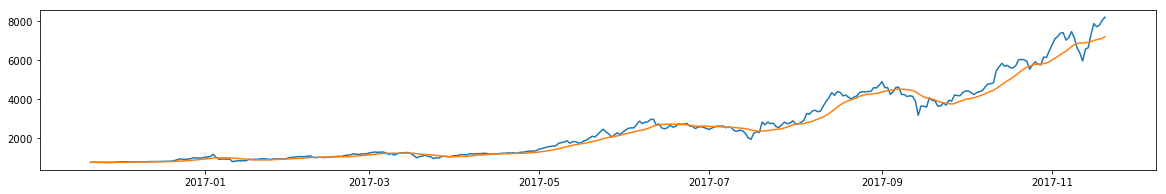

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(bitcoin.index, bitcoin['Close'] , label="Close")
plt.plot(bitcoin.index, bitcoin['SMA14'] , label="Close")

In [14]:
n_train = (bitcoin['Y'].count()*0.7).astype(int)

X = bitcoin[['Open', 'High', 'Low', 'Close','SMA14']]
y = bitcoin['Y']

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:] 

pipe = Pipeline([("scaler", MinMaxScaler()),("mlp",MLPRegressor(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]))])

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'mlp__activation':['tanh', 'relu', 'logistic'],
             'mlp__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Beste Genauigkeit nach Kreuzvalidierung: {:.2f}".format(grid.best_score_))
print("Bester Score auf den Testdaten: {:.2f}".format(grid.score(X_test, y_test)))
print("Beste Parameter: {}".format(grid.best_params_))

Beste Genauigkeit nach Kreuzvalidierung: 0.78
Bester Score auf den Testdaten: 0.97
Beste Parameter: {'mlp__activation': 'relu', 'mlp__alpha': 0.001}


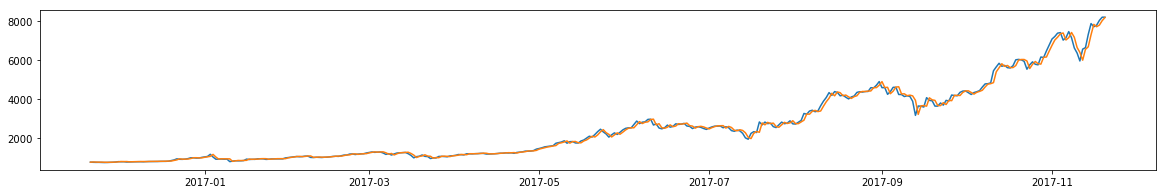

In [9]:
y_predict = grid.predict(X)
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(bitcoin.index, bitcoin['Y'] , label="close")
plt.plot(bitcoin.index, y_predict , label="close")

In [18]:
bitcoin.to_csv('/home/ml/datasets/bitcoin_60_2017.csv', sep=';')